In [24]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

%matplotlib inline

In [54]:
colors = {"Brown Coal" : "brown",
          "Hard Coal" : "k",
          "Nuclear" : "r",
          "Hydro" : "cyan",
          "Wind" : "blue",
          "Solar" : "yellow",
          "Biomass" : "green",
          "Waste" : "orange",
          "Gas" : "orange",
          "Oil" : "gray"}

# Fixed generation, varying demand

In [55]:
index = ["Wind","Nuclear","Brown Coal","Hard Coal","Hard Coal","Gas","Gas","Oil"]

df = pd.DataFrame(index=index)

df["bid"] = [20,15,25,10,5,10,10,5]

df["cost"] = [0,5,10,20,25,50,60,75]

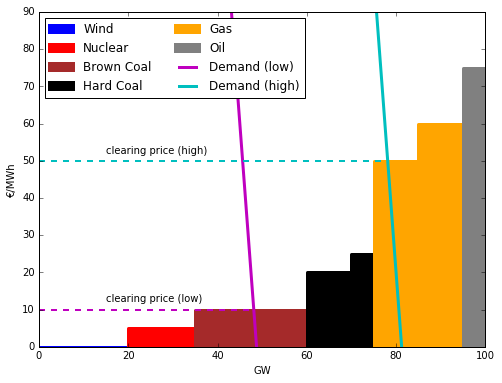

In [61]:
fig,ax = plt.subplots(1,1)

fig.set_size_inches((8,6))

bid_floor = 0.

previous = None
for i,row in df.iterrows():
    bid = row["bid"]
    cost = row["cost"]

    ax.fill_between([bid_floor,bid_floor+bid],cost,color=colors[i],linewidth=3)

    if i != previous:
        ax.plot([], [], color=colors[i], linewidth=10,label=i)
    
    bid_floor+=bid
    previous = i
    
ax.set_ylabel(u"€/MWh")

ax.set_xlabel("GW")

x = np.arange(0,100,1.)

a = -16

b = 60*65/5

ax.plot(x,a*x+b,label="Demand (low)",linewidth=3,color="m")

price = 10

intercept = (price-b)/a

ax.plot([0,intercept],[price,price],linewidth=2,linestyle="--",color="m")

ax.text(15,price+2,"clearing price (low)")


a = -16

b = 100*65/5

ax.plot(x,a*x+b,linewidth=3,color="c",label="Demand (high)")

price = 50

intercept = (price-b)/a

ax.plot([0,intercept],[price,price],linewidth=2,linestyle="--",color="c")

ax.text(15,price+2,"clearing price (high)")


ax.set_ylim([0,90])

ax.set_xlim([0,100])

ax.legend(loc="upper left",ncol=2)
#df.plot(ax=ax)

In [62]:
fig.tight_layout()
fig.savefig("demand-supply.pdf")

# Fixed demand, varying VRE

In [84]:
index = ["Wind","Nuclear","Brown Coal","Hard Coal","Hard Coal","Gas","Gas","Oil"]

df = pd.DataFrame(index=index)

wind = 0
wind = 33

df["bid"] = [wind,15,25,10,5,10,10,5]

df["cost"] = [0,5,10,20,25,50,60,75]

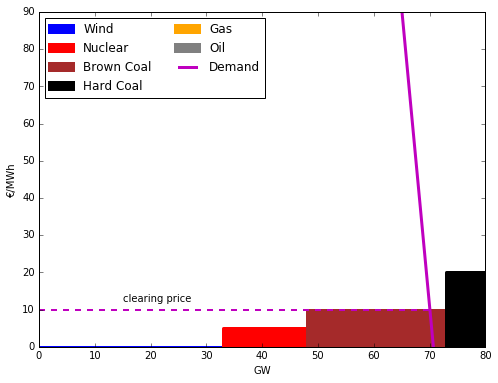

In [86]:
fig,ax = plt.subplots(1,1)

fig.set_size_inches((8,6))

bid_floor = 0.

previous = None
for i,row in df.iterrows():
    bid = row["bid"]
    cost = row["cost"]

    ax.fill_between([bid_floor,bid_floor+bid],cost,color=colors[i],linewidth=3)

    if i != previous:
        ax.plot([], [], color=colors[i], linewidth=10,label=i)
    
    bid_floor+=bid
    previous = i
    
ax.set_ylabel(u"€/MWh")

ax.set_xlabel("GW")

x = np.arange(0,100,1.)

a = -16

b = 87*65/5

ax.plot(x,a*x+b,label="Demand",linewidth=3,color="m")

price = 10

intercept = (price-b)/a

ax.plot([0,intercept],[price,price],linewidth=2,linestyle="--",color="m")

ax.text(15,price+2,"clearing price")


ax.set_ylim([0,90])

ax.set_xlim([0,80])

ax.legend(loc="upper left",ncol=2)
#df.plot(ax=ax)

In [87]:
fig.tight_layout()
fig.savefig("demand-supply-with_wind.pdf")